# Задача 12.47

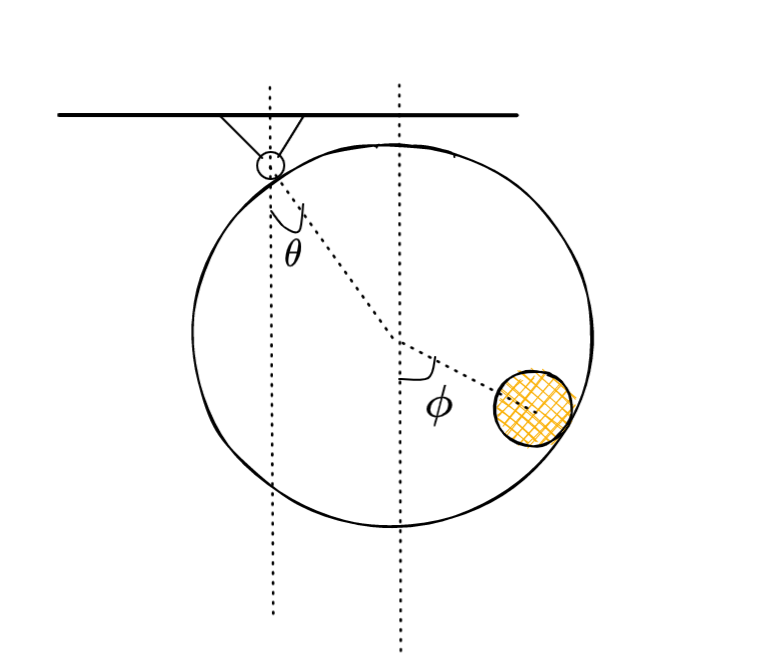


In [255]:
import sympy as smp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [256]:
t, m, M, g,R,r = smp.symbols("t m M g R r")
theta, phi = smp.symbols(r"\theta \phi",cls = smp.Function)

theta = theta(t)
theta_d = smp.diff(theta,t)
theta_dd = smp.diff(theta_d,t)

phi = phi(t)
phi_d = smp.diff(phi,t)
phi_dd = smp.diff(phi_d,t)


In [257]:
T = M*(R**2)*(theta_d**2)+(m/2)*((phi_d**2)*((R-r)**2)+(theta_d**2)*(R**2)+2*phi_d*theta_d*(R-r)*smp.cos(theta-phi))+(m/4)*((R*theta_d-(R-r)*phi_d)**2)

In [258]:
P = -m*g*R*smp.cos(theta)-m*g*(R-r)*smp.cos(phi)-M*g*R*smp.cos(theta)

In [259]:
L = T-P
L

M*R**2*Derivative(\theta(t), t)**2 + M*R*g*cos(\theta(t)) + R*g*m*cos(\theta(t)) + g*m*(R - r)*cos(\phi(t)) + m*(R*Derivative(\theta(t), t) - (R - r)*Derivative(\phi(t), t))**2/4 + m*(R**2*Derivative(\theta(t), t)**2 + (R - r)**2*Derivative(\phi(t), t)**2 + 2*(R - r)*cos(\phi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(\theta(t), t))/2

##### Уравнение 1

In [260]:
eq_1 = (smp.diff(smp.diff(L,theta_d),t)-smp.diff(L,theta)).simplify()
eq_1

2*M*R**2*Derivative(\theta(t), (t, 2)) + M*R*g*sin(\theta(t)) + R*g*m*sin(\theta(t)) + R*m*(R*Derivative(\theta(t), (t, 2)) - (R - r)*Derivative(\phi(t), (t, 2)))/2 - m*(R - r)*sin(\phi(t) - \theta(t))*Derivative(\phi(t), t)*Derivative(\theta(t), t) + m*(R**2*Derivative(\theta(t), (t, 2)) - (R - r)*(Derivative(\phi(t), t) - Derivative(\theta(t), t))*sin(\phi(t) - \theta(t))*Derivative(\phi(t), t) + (R - r)*cos(\phi(t) - \theta(t))*Derivative(\phi(t), (t, 2)))

In [261]:
eq_2 = (smp.diff(smp.diff(L,phi_d),t)-smp.diff(L,phi)).simplify()
eq_2

m*(R - r)*(3*R*Derivative(\phi(t), (t, 2)) - R*Derivative(\theta(t), (t, 2)) + 2*g*sin(\phi(t)) - 3*r*Derivative(\phi(t), (t, 2)) + 2*sin(\phi(t) - \theta(t))*Derivative(\theta(t), t)**2 + 2*cos(\phi(t) - \theta(t))*Derivative(\theta(t), (t, 2)))/2

In [262]:
sols = smp.solve([eq_1,eq_2],[theta_dd,phi_dd],rational = False,simplify = False)

In [263]:
sols[theta_dd]

-3*M*R*g*sin(\theta(t))/(6*M*R**2 + 4*R**2*m + 2*R*m*cos(\phi(t) - \theta(t)) - 2*m*cos(\phi(t) - \theta(t))**2) - R*g*m*sin(\phi(t))/(6*M*R**2 + 4*R**2*m + 2*R*m*cos(\phi(t) - \theta(t)) - 2*m*cos(\phi(t) - \theta(t))**2) - 3*R*g*m*sin(\theta(t))/(6*M*R**2 + 4*R**2*m + 2*R*m*cos(\phi(t) - \theta(t)) - 2*m*cos(\phi(t) - \theta(t))**2) + 3*R*m*sin(\phi(t) - \theta(t))*Derivative(\phi(t), t)**2/(6*M*R**2 + 4*R**2*m + 2*R*m*cos(\phi(t) - \theta(t)) - 2*m*cos(\phi(t) - \theta(t))**2) - R*m*sin(\phi(t) - \theta(t))*Derivative(\theta(t), t)**2/(6*M*R**2 + 4*R**2*m + 2*R*m*cos(\phi(t) - \theta(t)) - 2*m*cos(\phi(t) - \theta(t))**2) + 2*g*m*sin(\phi(t))*cos(\phi(t) - \theta(t))/(6*M*R**2 + 4*R**2*m + 2*R*m*cos(\phi(t) - \theta(t)) - 2*m*cos(\phi(t) - \theta(t))**2) - 3*m*r*sin(\phi(t) - \theta(t))*Derivative(\phi(t), t)**2/(6*M*R**2 + 4*R**2*m + 2*R*m*cos(\phi(t) - \theta(t)) - 2*m*cos(\phi(t) - \theta(t))**2) + 2*m*sin(\phi(t) - \theta(t))*cos(\phi(t) - \theta(t))*Derivative(\theta(t), t)**2/

In [264]:
w_theta_d_f = smp.lambdify((g,m,M,r,R,phi,theta,phi_d,theta_d),sols[theta_dd])
theta_d_f = smp.lambdify(theta_d,theta_d)
phi_d_f = smp.lambdify(phi_d,phi_d)
w_phi_d_f = smp.lambdify((g,m,M,r,R,phi,theta,phi_d,theta_d),sols[phi_dd])

In [265]:
def system(S,t):
    theta,w_theta,phi,w_phi = S
    return [
        theta_d_f(w_theta),
        w_theta_d_f(g,m,M,r,R,phi,theta,w_phi,w_theta),
        phi_d_f(w_phi),
        w_phi_d_f(g,m,M,r,R,phi,theta,w_phi,w_theta)
    ]

In [266]:
g = 9.81
M = 2
m = 1
r = 0.5
R = 2
t = np.linspace(0,20,500)
ans = odeint(system,y0 = [np.pi/4,0.5,np.pi/3,0],t = t)

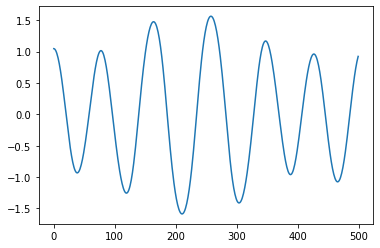

In [267]:
plt.plot(ans.T[2])

In [268]:
ans.T[2][20]

0.010166942007506424

In [269]:
center1 = (np.sin(ans.T[0])*R,-np.cos(ans.T[0])*R)
center2 = (np.sin(ans.T[2])*(R-r)+center1[0],-np.cos(ans.T[2])*(R-r)+center1[1])

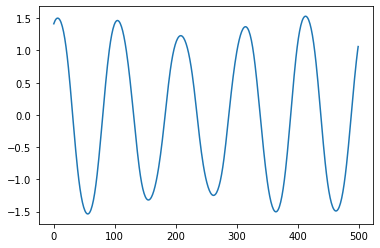

In [270]:
plt.plot(center1[0])

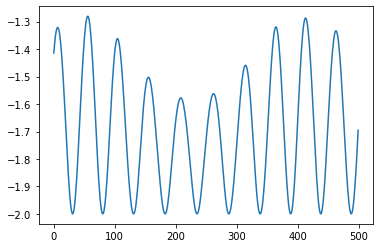

In [271]:
plt.plot(center1[1])

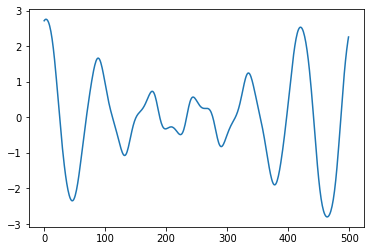

In [272]:
plt.plot(center2[0])

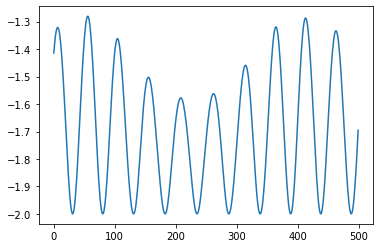

In [273]:
plt.plot(center1[1])

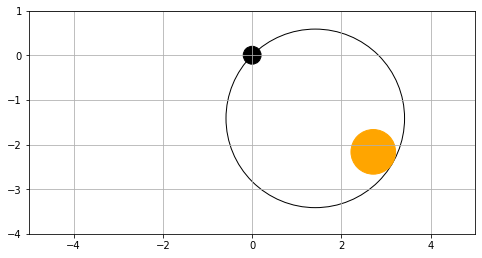

In [277]:
from matplotlib.animation import FuncAnimation
c1 = plt.Circle((center1[0][0],center1[1][0]),R,fill = False,animated = True)
c2 = plt.Circle((center2[0][0],center2[1][0]),r,color = 'orange',fill = True,animated = True)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(-5, 5), ylim=(-4, 1))
ax.set_aspect('equal')
plt.grid()
def init():
    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(plt.Circle((0,0),0.2,color = 'black'))
    return [c1,c2]

def animate(i):
    c1.set_center((center1[0][i],center1[1][i]))
    c2.set_center((center2[0][i],center2[1][i]))
    return [c1,c2]


anim = FuncAnimation(fig, animate, init_func=init,
                     frames=500, interval=50, blit=True)
plt.show()
anim.save('animation.mp4', fps=30, 
          extra_args=['-vcodec', 'h264', 
                      '-pix_fmt', 'yuv420p'])
